# Question 1a: %timeit
You may know from your experiences with matlab that you should always prefer vector- or matrix-based operations over for loops, if possible (hence the name **mat**(rix)**lab**(oratory)). The same is true of python -- you should prefer numpy-array-based operations over for loops. This will also be important for tensorflow -- as much as possible, you should avoid using python for loops when writing tensorflow code. To examine the impact of using for loops over numpy-array-based operations, for this question, you will exploit one of jupyter's built-in magic commands, `%timeit`:

In [1]:
import numpy as np
%timeit np.zeros((100,100))  # provide statistics on how long it takes to generate a 100x100 array of 0s

2.08 µs ± 87.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


As you can see, all you need to do is put `%timeit` before the command that you would normally run and jupyter will run that line multiple times to generate computation timing statistics.

Now, let's compare the computation timing for multiplying two random matrices, each with a dimension of 100x100, using 1) `np.matmul` and 2) multiple embedded for loops. For (2), please write your own function to implement the for loops. Feel free to wrap (2) into a function definition. Verify that (1) and (2) produce the same output. According to `%timeit`, how many times faster is (1) than (2)?

In [2]:
# Initialize two random matrices. Round the matrices to reduce precision
ran1 = np.round(np.random.rand(100, 100))
ran2 = np.round(np.random.rand(100, 100))

# np.matmul method
print('Timing result from np.matmul: ')
%timeit np.matmul(ran1, ran2)
out1 = np.matmul(ran1, ran2)

# For-loop method
def matrix_mul(ran1, ran2):
    out = np.zeros([ran1.shape[0], ran2.shape[1]])  # Initialize output matrix
    for i in range(ran2.shape[1]):  # Loop through cols of matrix 2
        for j in range(ran1.shape[0]):  # Loop through rows of matrix 1
            out[j,i] = np.dot(ran1[j,:],ran2[:,i])  # Each cell value of the output matrix is the dot product of the two 
                                                    # extracted vectors from ran1 and ran2
    return out

print('Timing result from for-loop method: ')
%timeit matrix_mul(ran1, ran2)
out2 = matrix_mul(ran1, ran2)

print('Check if two matrices have the same output: ')
print(out1==out2)

Timing result from np.matmul: 
26.1 µs ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Timing result from for-loop method: 
11.2 ms ± 979 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Check if two matrices have the same output: 
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


As we can see from the timing results, np.matmul method (1) is approximately 480 times faster than for-loop method (2). 

# Question 1b
There are two main ways of computing convolutions digitally: 1) directly, using the definition of a convolution, and 2) using the convolution theorem that you proved in the written portion of this homework assignment (i.e., using ffts). Which method is more efficient depends on the sizes of the inputs. Let's use `%timeit` to compare the speeds for 1D convolutions using [`scipy.signal.convolve `](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html). This function has an argument called "method", which can be set to "direct" or "fft", which correspond to (1) and (2) above. Use this function to convolve two random 1D signals of lengths $n=100, 500, 1000,$ and $2000$, and compare the speed of both methods. For which n do(es) method 1 outperform method 2, and vice versa? Can you make any generalizations based on these results about when one method outperforms the other?

In [3]:
from scipy.signal import convolve
import timeit
import matplotlib.pyplot as plt
# Initialize array of n lengths of signal
n = [100, 500, 1000, 2000]

for i in n:
    # Initialize two 1D signals
    sig1 = np.round(np.random.rand(1, i))
    sig2 = np.round(np.random.rand(1, i))
    
    # Timing results:
    print('n =', str(i))
    print('Speed of direct method: ')
    %timeit convolve(sig1, sig2, method='direct')
    print('Speed of fft method: ')
    %timeit convolve(sig1, sig2, method='fft')

n = 100
Speed of direct method: 


C:\Users\Tri Vu\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
C:\Users\Tri Vu\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:251: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  in1zpadded[sc] = in1.copy()


262 µs ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Speed of fft method: 
136 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
n = 500
Speed of direct method: 
5.72 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Speed of fft method: 
189 µs ± 4.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
n = 1000
Speed of direct method: 
23 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Speed of fft method: 
234 µs ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
n = 2000
Speed of direct method: 
92.7 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Speed of fft method: 
340 µs ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


From the output, we can see that with largest n = 2000, (1) outperforms (2). Specifically, the larger n is, the more (1) outperforms (2). Such that, we can see that fft method has faster speed than direct method when the utilized matrices (vectors) are bigger.

# Question 2: the convolution theorem
As we investigated in question 1b, it is also possible to do convolutions using Fourier transforms, and in some cases this is the preferable method. In fact, there is some body of work investigating the use of ffts and multiplication to do convolution operations in convolutional neural networks. 

For this question, to illustrate this theorem, given a convolutional kernel you will find the corresponding Fourier operation that produces the same result. To this end,

1. create a 7x7 Gaussian kernel with a standard deviation $\sigma=2$ (using a pixel grid spacing of 1)
2. load an image, if it is color then convert it to grayscale (you can just sum the 3 color channels), and then resize the image into a 128x128 array
3. compute the convolution  - you can use a numpy (np) or scipy function. Make sure the output is the same size as the input image, which is slightly different than the formal definition of a discrete convolution, but is something that is usually convenient to do.
4. Find the Fourier filter that does the same operation in the Fourier domain, and show the resulting blurred image implemented using the Fourier method (i.e., if $I_{2}=I_{1}*h$, then $\mathcal{F}[I_{2}]=\mathcal{F}[I_{1}]\mathcal{F}[h]$, so find the correct array for $\mathcal{F}[h]$ and re-generate $I_2$). 

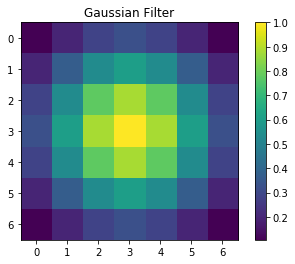

C:\Users\Tri Vu\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Tri Vu\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


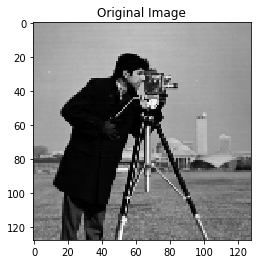

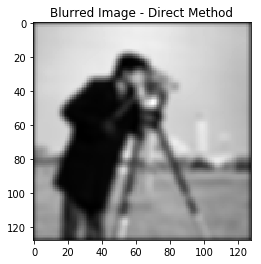

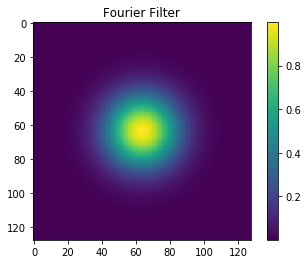

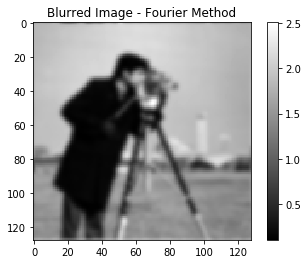

In [4]:
# the following line will cause subsequent plotting commands to display directly in the notebook
%matplotlib inline
from scipy import signal
from scipy.signal import convolve2d
from skimage.transform import resize

# 1. Create 7x7 Gaussian kernel and display
def gaussian_gen(size, sigma):  # Function to define Gaussian filter
    g = signal.gaussian(size, std=sigma)
    kernel = np.outer(g, g)
    return kernel

kernel = gaussian_gen(size=7, sigma=2)
plt.imshow(kernel)
plt.colorbar()
plt.title('Gaussian Filter')
plt.show()

# 2. Load an image, resize to [128, 128] and display
img = plt.imread('duke.png')
img = np.sum(img, axis=2)
img = resize(img, [128, 128])
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

# 3. Compute convolution
conv = convolve2d(img, kernel, mode='same')
plt.imshow(conv, cmap='gray')
plt.title('Blurred Image - Direct Method')
plt.show()

# 4. Fourier method
kernel2 = gaussian_gen(size=128, sigma=15)  # Create Gaussian filter in Fourier domain (same size as the input image). FFT of a
                                            # Gaussian is a Gaussian
plt.imshow(kernel2)  # Display the Fourier filter
plt.colorbar()
plt.title('Fourier Filter')
plt.show()

img_fft = np.fft.fft2(img)  # Fourier transform image
img_fft = np.fft.fftshift(img_fft) 

img_filt = img_fft*kernel2  # This line is equivalent to F[I2] = F[I1]*F[h]
img_filt = abs(np.fft.ifft2(img_filt))  # Inverse FFT

plt.imshow(img_filt, cmap='gray')  
plt.colorbar()
plt.title('Blurred Image - Fourier Method')
plt.show()

# Question 3: data augmentation
One indispensable tool used in deep learning is data augmentation. That is, we can to some extent artificially increase the size of our dataset by randomly altering the current dataset. One common augmenting operation is to do random crops of the original image. For example, researchers designing neural networks for ImageNet, a dataset of natural RGB images, typically resize the images to 256x256x3 and then take a random 224x224x3 crop such that the latter fits entirely in the former.

For this question, take a picture with your phone or find a picture online, load it into jupyter, resize it to 256x256x3 (discard the alpha channel if one is present), and then perform the random 224x224x3 crop. The crops should be uniformly distributed within the bounding 256x256 box and do not need to be rotated. Please display the 256x256x3 image and 5 random crops using `plt.imshow`.

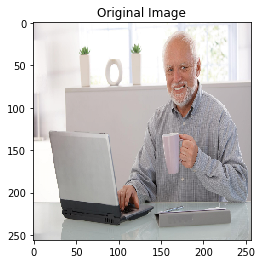

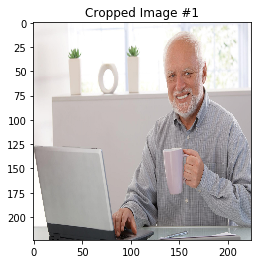

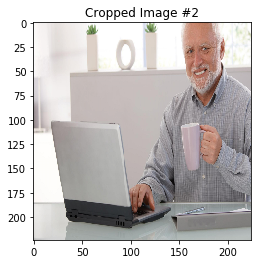

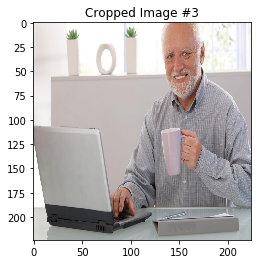

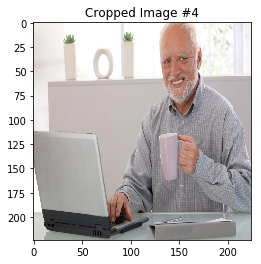

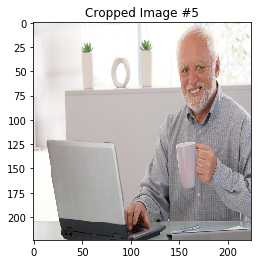

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing (load, resize, show original image)
imgq3 = plt.imread('harold.jpg')
imgq3 = resize(imgq3, [256, 256, 3])
plt.imshow(imgq3)
plt.title('Original Image')
plt.show()

# Generate random positions for top-left (tl) index. This index serves as the "anchor" point.
x_tl = np.random.randint(0, 31, size=5)
y_tl = np.random.randint(0, 31, size=5)

# Loop through all 5 tl indices to generate 5 cropped images
for i in range(5):
    cropped = imgq3[x_tl[i]:x_tl[i]+224, y_tl[i]:y_tl[i]+224, :]  # Output image is from 
                                                                  # [x_tl --> x_tl + 224, y_tl --> y_tl + 224] of the original
                                                                  # image
    plt.imshow(cropped)
    plt.title('Cropped Image #' + str(i+1))
    plt.show()